In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf
from tensorflow.keras import utils

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [138]:
# 데이터 불러오기
import csv
f = open('sentiment_data_all.csv', 'r', encoding='utf-8')
lines = csv.reader(f)
header = next(lines)
print(header)
f.close()

review = pd.read_csv('sentiment_data_all.csv', encoding='utf-8')
review.head()

['브랜드', '평점', '피부타입', '피부고민', '자극도', '리뷰', 'sentiment']


,브랜드,평점,피부타입,피부고민,자극도,리뷰,sentiment
0,닥터지,5,건성에 좋아요,진정에 좋아요,자극없이 순해요,닥터지는 사계절 내내 잘 사용하고잇어요 물론 건성피부에게 겨울에는 얼굴당김잇어서...,1
1,닥터지,5,복합성에 좋아요,진정에 좋아요,보통이에요,아빠 사드렸는데 좋아해요 근데 바르는게 쫌 별로긴 한데 투브타입으로 나오면 더 좋을 듯,1
2,닥터지,5,건성에 좋아요,보습에 좋아요,자극없이 순해요,국민 수분 크림이라 그런지 모든 피부타입에도 잘 맞으면서 무난한 아이템이에요 당황이...,1
3,닥터지,4,복합성에 좋아요,보습에 좋아요,자극없이 순해요,여름용 수분크림이 필요해서 산 제품이에요 가격은 세일가로 28800원 했어요사실...,1
4,닥터지,5,지성에 좋아요,진정에 좋아요,자극없이 순해요,사용감이 가벼운 제품이라 여름에 쓰기 너무 좋아요 수딩크림 같은 제형이고 끈적임이 ...,1


In [139]:
texts = review['리뷰'].values
labels = review['sentiment'].values

In [140]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.3, random_state=731)

In [142]:
max_words = 10000  # 사용할 최대 단어 수
max_len = 100  # 각 시퀀스의 최대 길이

In [143]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [144]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'잘': 1, '너무': 2, '좋아요': 3, '같아요': 4, '것': 5, '더': 6, '피부가': 7, '피부': 8, '피부에': 9, '좋은': 10, '이': 11, '많이': 12, '바르고': 13, '수': 14, '좋고': 15, '있어요': 16, '다': 17, '저는': 18, '진짜': 19, '크림': 20, '쓰고': 21, '1': 22, '정말': 23, '촉촉하고': 24, '여름에': 25, '좀': 26, '꾸준히': 27, '바로': 28, '않고': 29, '바르면': 30, '때': 31, '닥터지': 32, '있어서': 33, '없이': 34, '순하고': 35, '있는': 36, '사용하고': 37, '좋아서': 38, '느낌이': 39, '제품': 40, '좋네요': 41, '이거': 42, '거': 43, '딱': 44, '구매했어요': 45, '안': 46, '수분': 47, '아주': 48, '좋습니다': 49, '사용하기': 50, '쓰기': 51, '앰플': 52, '얼굴에': 53, '이번에': 54, '없고': 55, '제가': 56, '않아서': 57, '같이': 58, '제품은': 59, '엄청': 60, '크림을': 61, '또': 62, '얼굴': 63, '있습니다': 64, '계속': 65, '요즘': 66, '다른': 67, '수분크림': 68, '좋았어요': 69, '에스트라': 70, '항상': 71, '조금': 72, '확실히': 73, '발라도': 74, '그리고': 75, '흡수도': 76, '사용': 77, '있는데': 78, '제': 79, '해서': 80, '넘': 81, '완전': 82, '아비브': 83, '자극없이': 84, '아이크림': 85, '마녀공장': 86, '사용할': 87, '근데': 88, '없어서': 89, '크림은': 90, '미스트': 91, '전에': 92, '촉촉하게': 93, '후': 94, '그냥': 95, '수분감이': 96, '흡수가'

In [145]:
vocab_size = len(word_to_index) + 1
print('전체 단어 집합의 크기 : ', vocab_size)

전체 단어 집합의 크기 :  26384


In [146]:
# 패딩 처리
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [147]:
X_train_pad

array([[   0,    0,    0, ..., 8598, 8599, 5434],
       [   0,    0,    0, ...,  534,    2, 8604],
       [   0,    0,    0, ..., 8605,  383, 8606],
       ...,
       [   0,    0,    0, ..., 2208,   26,   64],
       [   0,    0,    0, ...,   24,  100,  139],
       [   0,    0,    0, ...,   48,  206,  582]], dtype=int32)

In [148]:
X_test_pad

array([[   0,    0,    0, ...,  514,  912,  813],
       [   0,    0,    0, ..., 1739,  943,  130],
       [   0,    0,    0, ...,  872,  122, 1941],
       ...,
       [   0,    0,    0, ...,  170,  516,   64],
       [   0,    0,    0, ...,    1,   21,   64],
       [   0,    0,    0, ...,  447,  207, 5433]], dtype=int32)

## Transformer

In [167]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.3):  # Dropout 비율 조정
        super(TransformerEncoder, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu", kernel_regularizer=l2(0.01)),  # L2 정규화 추가
             Dense(embed_dim, kernel_regularizer=l2(0.01))]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [168]:
def build_model(max_len, max_words):
    embed_dim = 128  
    num_heads = 4
    ff_dim = 128 

    inputs = Input(shape=(max_len,))
    embedding_layer = Embedding(input_dim=max_words, output_dim=embed_dim, input_length=max_len)(inputs)
    transformer_block = TransformerEncoder(embed_dim, num_heads, ff_dim)(embedding_layer)
    x = GlobalAveragePooling1D()(transformer_block)
    x = Dropout(0.3)(x)  # Dropout 비율 조정
    x = Dense(20, activation="relu", kernel_regularizer=l2(0.01))(x)  # L2 정규화 추가
    x = Dropout(0.3)(x)  # Dropout 비율 조정
    outputs = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

model_transformer = build_model(max_len, max_words)
model_transformer.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_18 (Embedding)    (None, 100, 128)          1280000   
                                                                 
 transformer_encoder_6 (Tran  (None, 100, 128)         297344    
 sformerEncoder)                                                 
                                                                 
 global_average_pooling1d_6   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_83 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 20)                2580

In [169]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [170]:
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

In [171]:
history_transformer = model_transformer.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[es, lr_scheduler])

Epoch 1/10
97/97 [==============================] - 29s 284ms/step - loss: 1.8616 - accuracy: 0.9607 - val_loss: 0.9859 - val_accuracy: 0.9610 - lr: 0.0010
Epoch 2/10
97/97 [==============================] - 31s 319ms/step - loss: 0.6355 - accuracy: 0.9649 - val_loss: 0.4093 - val_accuracy: 0.9610 - lr: 0.0010
Epoch 3/10
97/97 [==============================] - 33s 338ms/step - loss: 0.3181 - accuracy: 0.9649 - val_loss: 0.2377 - val_accuracy: 0.9610 - lr: 0.0010
Epoch 4/10
97/97 [==============================] - 33s 344ms/step - loss: 0.1495 - accuracy: 0.9753 - val_loss: 0.2347 - val_accuracy: 0.9558 - lr: 9.0484e-04
Epoch 5/10
97/97 [==============================] - 30s 313ms/step - loss: 0.0791 - accuracy: 0.9928 - val_loss: 0.2275 - val_accuracy: 0.9467 - lr: 8.1873e-04
Epoch 6/10
97/97 [==============================] - 29s 297ms/step - loss: 0.0515 - accuracy: 0.9948 - val_loss: 0.2854 - val_accuracy: 0.9571 - lr: 7.4082e-04
Epoch 7/10
97/97 [==============================] - 

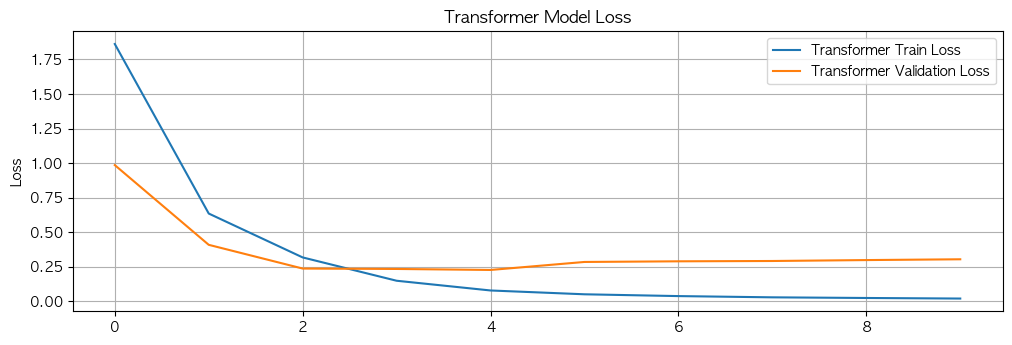

In [176]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history_transformer.history['loss'], label='Transformer Train Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Transformer Model Loss')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

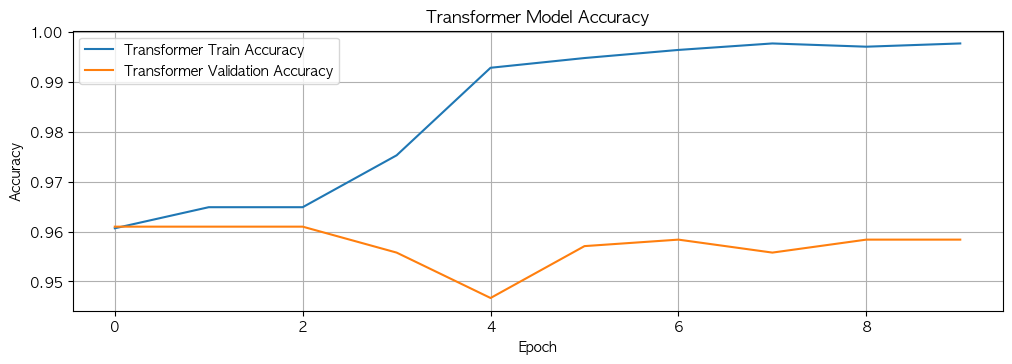

In [177]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(history_transformer.history['accuracy'], label='Transformer Train Accuracy')
plt.plot(history_transformer.history['val_accuracy'], label='Transformer Validation Accuracy')
plt.title('Transformer Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

### 데이터 증강

In [215]:
# Dropout값 조정, 정규화처리를 진행하였음에도 Accuracy값과 Loss을 통해 여전히 모델 성능이 좋지 않은 것을 확인하였다.
# 무작위 삽입, 단어 순서 변경 등을 활용하여 데이터 증강 후 다시 결과를 확인하고자 한다.

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import wordnet
import random

In [200]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jeon-
[nltk_data]     yewon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [216]:
# 무작위 삽입
def get_synonyms(word): # 주어진 단어의 동의어를 WordNet을 사용하여 찾아 리스트로 반환
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def random_insertion(words, n): # 입력된 단어 목록에서 n개의 단어를 무작위로 삽입
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words

def add_word(new_words): # 주어진 단어 목록에서 무작위로 단어를 선택하여 그 동의어를 새로운 위치에 삽입
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)

In [217]:
# 단어 순서 변경
def random_swap(words, n): # 입력된 단어 목록에서 n번의 단어 순서 변경을 수행
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words

def swap_word(new_words): # 주어진 단어 목록에서 두 개의 단어를 무작위로 선택하여 그 위치를 서로 바꿈
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        if counter > 3:
            return new_words
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
    return new_words

In [218]:
def augment_sentence(sentence): # 주어진 문장을 무작위 삽입과 단어 순서 변경 기법을 사용하여 증강
    words = sentence.split(' ')
    words = [word for word in words if word != '']
    num_words = len(words)

    augmented_sentences = []
    num_new_per_technique = 2

    augmented_sentences.append(' '.join(random_insertion(words, int(0.1*num_words))))
    augmented_sentences.append(' '.join(random_swap(words, int(0.1*num_words))))

    return augmented_sentences

augmented_texts = []
augmented_labels = []

for text, label in zip(X_train, y_train):
    augmented_sentences = augment_sentence(text)
    augmented_texts.extend(augmented_sentences)
    augmented_labels.extend([label]*len(augmented_sentences))

# 데이터 합치기
X_train_augmented = list(X_train) + augmented_texts
y_train_augmented = list(y_train) + augmented_labels

# 텍스트 토큰화 및 시퀀스 변환
tokenizer.fit_on_texts(X_train_augmented)

X_train_seq_augmented = tokenizer.texts_to_sequences(X_train_augmented)
X_train_pad_augmented = pad_sequences(X_train_seq_augmented, maxlen=max_len)

# NumPy 배열로 변환
X_train_pad_augmented = np.array(X_train_pad_augmented)
y_train_augmented = np.array(y_train_augmented)

In [209]:
model_transformer = build_model(max_len, max_words)
model_transformer.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 100)]             0         
                                                                 
 embedding_21 (Embedding)    (None, 100, 128)          1280000   
                                                                 
 transformer_encoder_9 (Tran  (None, 100, 128)         297344    
 sformerEncoder)                                                 
                                                                 
 global_average_pooling1d_9   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_95 (Dropout)        (None, 128)               0         
                                                                 
 dense_52 (Dense)            (None, 20)                2580

In [210]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [211]:
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

In [212]:
history_transformer = model_transformer.fit(X_train_pad_augmented, y_train_augmented, epochs=10, batch_size=32, validation_split=0.2, callbacks=[es, lr_scheduler])

Epoch 1/10
289/289 [==============================] - 63s 214ms/step - loss: 0.9642 - accuracy: 0.9616 - val_loss: 0.2040 - val_accuracy: 0.9610 - lr: 0.0010
Epoch 2/10
289/289 [==============================] - 68s 237ms/step - loss: 0.0961 - accuracy: 0.9871 - val_loss: 0.0628 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 3/10
289/289 [==============================] - 67s 231ms/step - loss: 0.0297 - accuracy: 0.9964 - val_loss: 0.0235 - val_accuracy: 0.9931 - lr: 0.0010
Epoch 4/10
289/289 [==============================] - 73s 252ms/step - loss: 0.0178 - accuracy: 0.9979 - val_loss: 0.0116 - val_accuracy: 0.9991 - lr: 9.0484e-04
Epoch 5/10
289/289 [==============================] - 65s 225ms/step - loss: 0.0128 - accuracy: 0.9976 - val_loss: 0.0091 - val_accuracy: 1.0000 - lr: 8.1873e-04
Epoch 6/10
289/289 [==============================] - 63s 217ms/step - loss: 0.0106 - accuracy: 0.9984 - val_loss: 0.0179 - val_accuracy: 0.9957 - lr: 7.4082e-04
Epoch 7/10
289/289 [====================

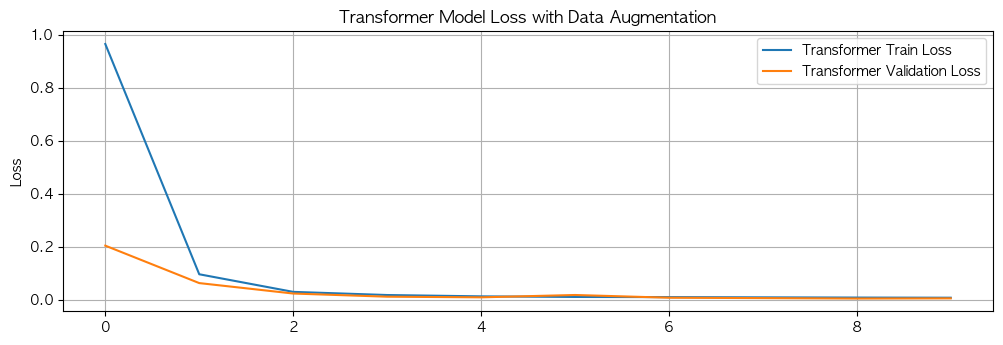

In [213]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Transformer 학습 및 검증 손실 곡선
plt.subplot(2, 1, 1)
plt.plot(history_transformer.history['loss'], label='Transformer Train Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Transformer Model Loss with Data Augmentation')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

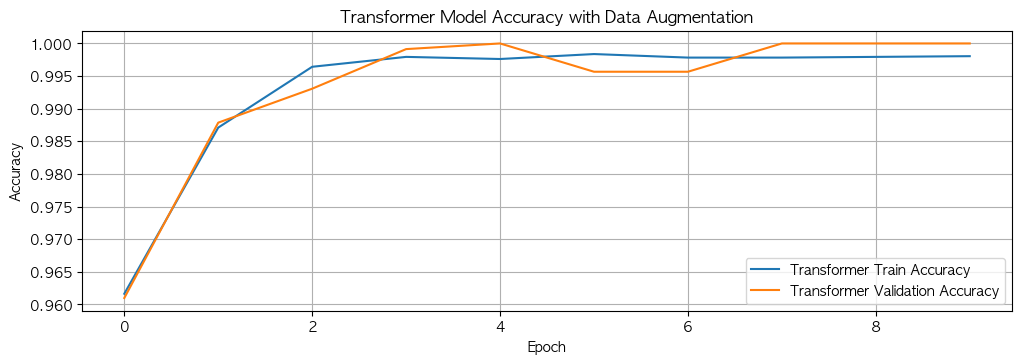

In [214]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(history_transformer.history['accuracy'], label='Transformer Train Accuracy')
plt.plot(history_transformer.history['val_accuracy'], label='Transformer Validation Accuracy')
plt.title('Transformer Model Accuracy with Data Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

## LSTM

In [151]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [161]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(128, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [162]:
model_lstm.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 100, 128)          1280000   
                                                                 
 lstm_8 (LSTM)               (None, 100, 128)          131584    
                                                                 
 dropout_79 (Dropout)        (None, 100, 128)          0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_80 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,461,057
Trainable params: 1,461,057
N

In [163]:
history_lstm = model_lstm.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[es])

Epoch 1/10
97/97 [==============================] - 14s 125ms/step - loss: 0.1899 - accuracy: 0.9603 - val_loss: 0.1648 - val_accuracy: 0.9610
Epoch 2/10
97/97 [==============================] - 13s 135ms/step - loss: 0.1531 - accuracy: 0.9649 - val_loss: 0.1670 - val_accuracy: 0.9610
Epoch 3/10
97/97 [==============================] - 21s 213ms/step - loss: 0.1528 - accuracy: 0.9649 - val_loss: 0.1596 - val_accuracy: 0.9610
Epoch 4/10
97/97 [==============================] - 22s 227ms/step - loss: 0.1096 - accuracy: 0.9649 - val_loss: 0.1353 - val_accuracy: 0.9610
Epoch 5/10
97/97 [==============================] - 26s 262ms/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.1598 - val_accuracy: 0.9519
Epoch 6/10
97/97 [==============================] - 24s 253ms/step - loss: 0.0196 - accuracy: 0.9954 - val_loss: 0.2063 - val_accuracy: 0.9597
Epoch 7/10
97/97 [==============================] - 23s 240ms/step - loss: 0.0110 - accuracy: 0.9974 - val_loss: 0.2041 - val_accuracy: 0.9597

In [164]:
# 모델 평가
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

52/52 [==============================] - 5s 94ms/step - loss: 0.9565 - accuracy: 0.0400
Test Loss: 0.9564791321754456
Test Accuracy: 0.040048543363809586


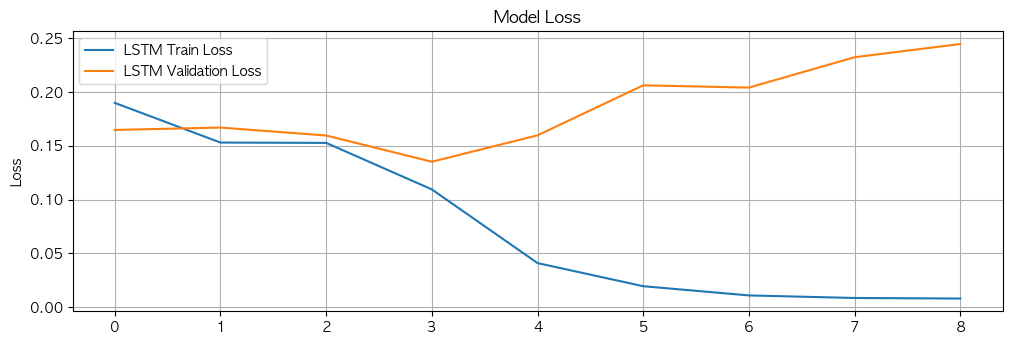

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

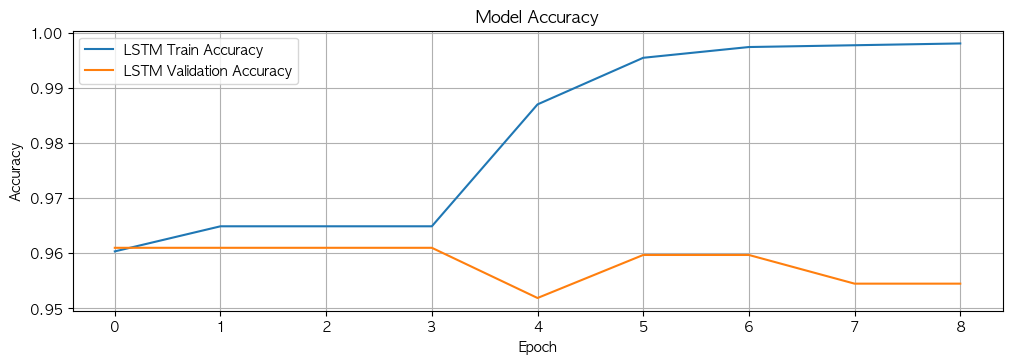

In [166]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

## GRU

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

In [98]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_gru.add(GRU(128, return_sequences=True))
model_gru.add(Dropout(0.5))
model_gru.add(GRU(64))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
model_gru.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 gru_4 (GRU)                 (None, 100, 128)          99072     
                                                                 
 dropout_54 (Dropout)        (None, 100, 128)          0         
                                                                 
 gru_5 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_55 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,416,385
Trainable params: 1,416,385
No

In [100]:
history_gru = model_gru.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[es])

Epoch 1/10
97/97 [==============================] - 13s 121ms/step - loss: 0.2165 - accuracy: 0.9613 - val_loss: 0.1465 - val_accuracy: 0.9571
Epoch 2/10
97/97 [==============================] - 16s 163ms/step - loss: 0.0780 - accuracy: 0.9694 - val_loss: 0.1511 - val_accuracy: 0.9610
Epoch 3/10
97/97 [==============================] - 17s 174ms/step - loss: 0.0134 - accuracy: 0.9941 - val_loss: 0.1760 - val_accuracy: 0.9610
Epoch 4/10
97/97 [==============================] - 25s 259ms/step - loss: 0.0067 - accuracy: 0.9971 - val_loss: 0.2317 - val_accuracy: 0.9571
Epoch 5/10
97/97 [==============================] - 19s 193ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.1746 - val_accuracy: 0.9649
Epoch 6/10
97/97 [==============================] - 21s 214ms/step - loss: 0.0048 - accuracy: 0.9977 - val_loss: 0.2313 - val_accuracy: 0.9610
Epoch 6: early stopping


In [101]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

52/52 [==============================] - 1s 13ms/step - loss: 0.2792 - accuracy: 0.9551
Test Loss: 0.2792294919490814
Test Accuracy: 0.9550970792770386


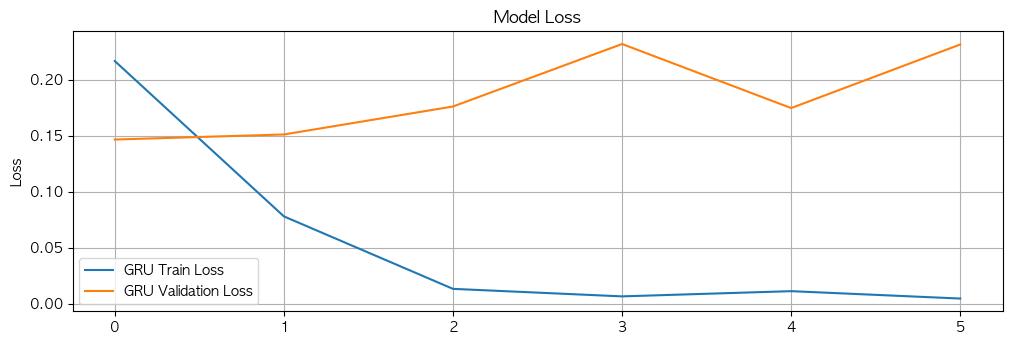

In [103]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

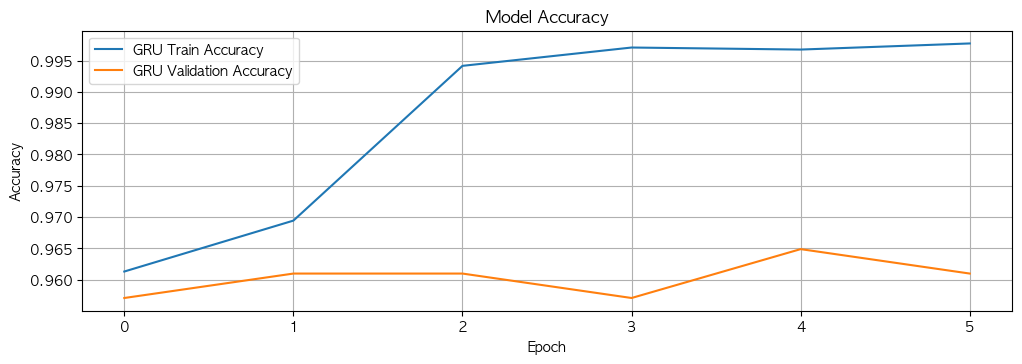

In [104]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(history_gru.history['accuracy'], label='GRU Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Conv1D(1D CNN)_텍스트 데이터 패턴 감지

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [106]:
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [107]:
model_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           82048     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dropout_56 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                     

In [108]:
history_cnn = model_cnn.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[es])

Epoch 1/10
97/97 [==============================] - 5s 50ms/step - loss: 0.2072 - accuracy: 0.9597 - val_loss: 0.1514 - val_accuracy: 0.9610
Epoch 2/10
97/97 [==============================] - 5s 48ms/step - loss: 0.1086 - accuracy: 0.9649 - val_loss: 0.1163 - val_accuracy: 0.9610
Epoch 3/10
97/97 [==============================] - 5s 47ms/step - loss: 0.0477 - accuracy: 0.9772 - val_loss: 0.1171 - val_accuracy: 0.9597
Epoch 4/10
97/97 [==============================] - 5s 49ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.1356 - val_accuracy: 0.9493
Epoch 5/10
97/97 [==============================] - 5s 51ms/step - loss: 0.0064 - accuracy: 0.9967 - val_loss: 0.1486 - val_accuracy: 0.9584
Epoch 6/10
97/97 [==============================] - 5s 55ms/step - loss: 0.0047 - accuracy: 0.9974 - val_loss: 0.1665 - val_accuracy: 0.9558
Epoch 7/10
97/97 [==============================] - 5s 50ms/step - loss: 0.0038 - accuracy: 0.9974 - val_loss: 0.1767 - val_accuracy: 0.9584
Epoch 7: earl

In [109]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

52/52 [==============================] - 1s 11ms/step - loss: 0.2792 - accuracy: 0.9551
Test Loss: 0.2792294919490814
Test Accuracy: 0.9550970792770386


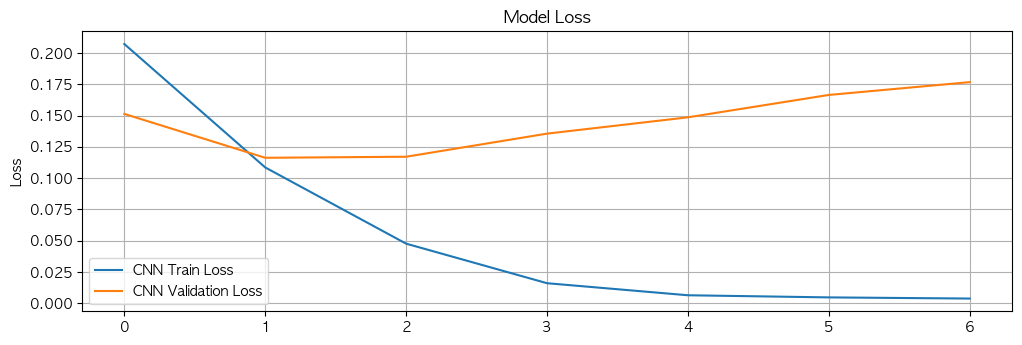

In [110]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

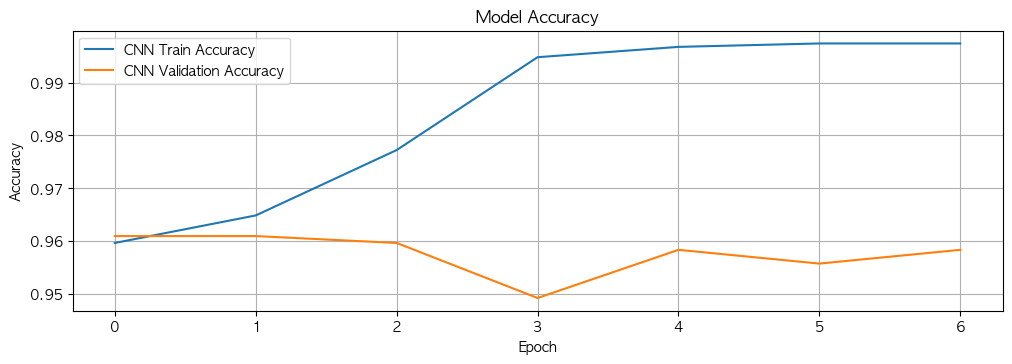

In [111]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(history_cnn.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

## 랜덤포레스트

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42)

In [26]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [28]:
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = rf_model.predict(X_test_tfidf)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [31]:
print(f'Test Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Test Accuracy: 0.9636032757051866
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        45
           1       0.96      1.00      0.98      1054

    accuracy                           0.96      1099
   macro avg       0.98      0.56      0.59      1099
weighted avg       0.96      0.96      0.95      1099



## 부정 데이터 증강

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from nltk.corpus import wordnet
import random

# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')

data_path = 'sentiment_data_all(부정).csv'
review = pd.read_csv(data_path, encoding='utf-8')

# 텍스트와 라벨 분리
texts = review['리뷰'].values.tolist()  # 리스트 형식으로 변환
brands = review['브랜드'].values.tolist()
ratings = review['평점'].values.tolist()
skin_types = review['피부타입'].values.tolist()
skin_concerns = review['피부고민'].values.tolist()
irritations = review['자극도'].values.tolist()
labels = review['sentiment'].values.tolist()  # 리스트 형식으로 변환

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(
    list(zip(texts, brands, ratings, skin_types, skin_concerns, irritations)),
    labels, test_size=0.2, random_state=42
)

In [5]:
# 무작위 삽입
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)

def random_insertion(words, n):
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words

In [6]:
# 단어 순서 변경
def swap_word(new_words):
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        if counter > 3:
            return new_words
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
    return new_words

def random_swap(words, n):
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words

In [7]:
# 증강된 데이터 생성
def augment_sentence(sentence):
    words = sentence.split(' ')
    words = [word for word in words if word != '']
    num_words = len(words)

    augmented_sentences = []
    num_new_per_technique = 2

    augmented_sentences.append(' '.join(random_insertion(words, int(0.1*num_words))))
    augmented_sentences.append(' '.join(random_swap(words, int(0.1*num_words))))

    return augmented_sentences

augmented_texts = []
augmented_brands = []
augmented_ratings = []
augmented_skin_types = []
augmented_skin_concerns = []
augmented_irritations = []
augmented_labels = []

for (text, brand, rating, skin_type, skin_concern, irritation), label in zip(X_train, y_train):
    for _ in range(8):  # 각 리뷰를 8번 증강 -> 본 숫자를 수정할 수록 데이터 개수가 조정됩니다!
        augmented_sentences = augment_sentence(text)
        augmented_texts.extend(augmented_sentences)
        augmented_brands.extend([brand] * len(augmented_sentences))
        augmented_ratings.extend([rating] * len(augmented_sentences))
        augmented_skin_types.extend([skin_type] * len(augmented_sentences))
        augmented_skin_concerns.extend([skin_concern] * len(augmented_sentences))
        augmented_irritations.extend([irritation] * len(augmented_sentences))
        augmented_labels.extend([label] * len(augmented_sentences))

# 데이터 합치기
X_train_augmented = list(zip(
    augmented_texts, augmented_brands, augmented_ratings, 
    augmented_skin_types, augmented_skin_concerns, augmented_irritations
))
y_train_augmented = augmented_labels

In [8]:
# 위치를 직접 지정했습니다.(이렇게 하지 않고 그냥 돌렸을 때 '리뷰'컬럼이 앞당겨집니다.)
augmented_data = pd.DataFrame({
    '브랜드': [x[1] for x in X_train_augmented],
    '평점': [x[2] for x in X_train_augmented],
    '피부타입': [x[3] for x in X_train_augmented],
    '피부 고민': [x[4] for x in X_train_augmented],
    '자극도': [x[5] for x in X_train_augmented],
    '리뷰': [x[0] for x in X_train_augmented],
    'sentiment': y_train_augmented
})

augmented_data.to_csv('augmented_sentiment_data_4000.csv', index=False, encoding='utf-8')

In [261]:
file1_path = 'sentiment_data_all(긍정).csv'
file2_path = 'augmented_sentiment_data_4000.csv'

data1 = pd.read_csv(file1_path, encoding='utf-8')
data2 = pd.read_csv(file2_path, encoding='utf-8')

In [262]:
combined_data = pd.concat([data1, data2], ignore_index=True)

combined_data.to_csv('combined_sentiment_data.csv', index=False, encoding='utf-8')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data_path = 'combined_sentiment_data.csv'
review = pd.read_csv(data_path, encoding='utf-8')

texts = review['리뷰'].values.tolist()
labels = review['sentiment'].values.tolist()

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42)

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.3):
        super(TransformerEncoder, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu", kernel_regularizer=l2(0.01)),
             Dense(embed_dim, kernel_regularizer=l2(0.01))]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [11]:
def build_model(max_len, max_words):
    embed_dim = 128
    num_heads = 8
    ff_dim = 128

    inputs = Input(shape=(max_len,))
    embedding_layer = Embedding(max_words, embed_dim, input_length=max_len)
    x = embedding_layer(inputs)
    x = TransformerEncoder(embed_dim, num_heads, ff_dim)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.5)(x)
    x = Dense(20, activation="relu")(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_transformer = build_model(max_len, max_words)
model_transformer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 transformer_encoder (Transf  (None, 100, 128)         561024    
 ormerEncoder)                                                   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                2580  

In [267]:
# 학습률 스케줄링
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history_transformer = model_transformer.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es, lr_scheduler]
)

Epoch 1/10
158/158 [==============================] - 68s 423ms/step - loss: 1.8143 - accuracy: 0.6531 - val_loss: 0.9484 - val_accuracy: 0.6701 - lr: 0.0010
Epoch 2/10
158/158 [==============================] - 64s 404ms/step - loss: 0.3753 - accuracy: 0.8874 - val_loss: 0.0642 - val_accuracy: 0.9984 - lr: 0.0010
Epoch 3/10
158/158 [==============================] - 65s 411ms/step - loss: 0.0378 - accuracy: 0.9986 - val_loss: 0.0302 - val_accuracy: 0.9984 - lr: 0.0010
Epoch 4/10
158/158 [==============================] - 75s 476ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 0.9984 - lr: 9.0484e-04
Epoch 5/10
158/158 [==============================] - 70s 444ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 0.0255 - val_accuracy: 0.9984 - lr: 8.1873e-04
Epoch 6/10
158/158 [==============================] - 68s 428ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 0.9984 - lr: 7.4082e-04
Epoch 7/10
158/158 [====================

In [268]:
loss, accuracy = model_transformer.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

50/50 [==============================] - 4s 87ms/step - loss: 4.3253e-06 - accuracy: 1.0000
Test Loss: 4.325294412410585e-06
Test Accuracy: 1.0


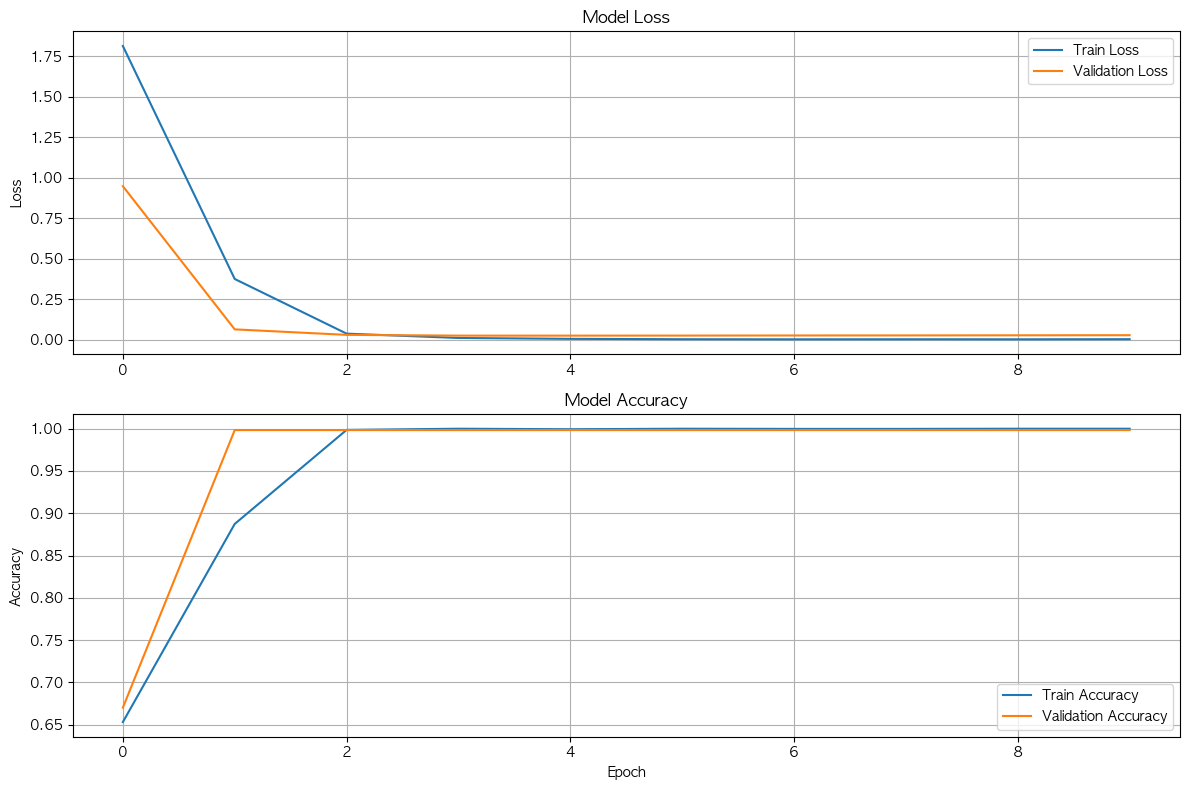

In [269]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history_transformer.history['loss'], label='Train Loss')
plt.plot(history_transformer.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history_transformer.history['accuracy'], label='Train Accuracy')
plt.plot(history_transformer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()